In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
plt.style.use("ggplot")

In [3]:
df = pd.read_csv("../data/diabetes.csv")

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.shape

(768, 9)

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
X = df.iloc[:,:-1]
Y = df.iloc[:, -1]

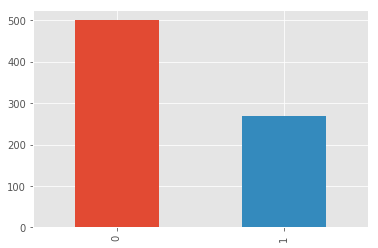

In [29]:
df.Outcome.value_counts().plot.bar()

In [8]:
X.shape, Y.shape

((768, 8), (768,))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025B9AAE20B8>,
      dtype=object)

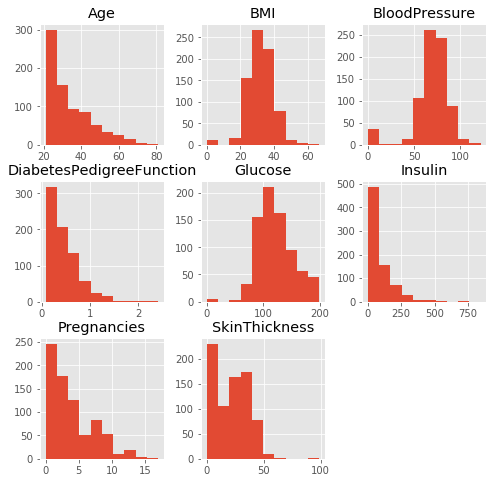

In [9]:
X.hist(figsize=(8,8))

In [15]:
X.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000


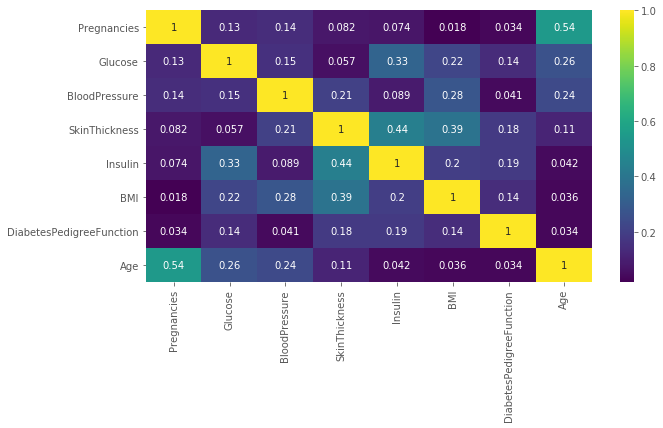

In [18]:
import seaborn as sns
plt.subplots(figsize=(10,5))
sns.heatmap(X.corr().abs(), cmap="viridis", annot=True)

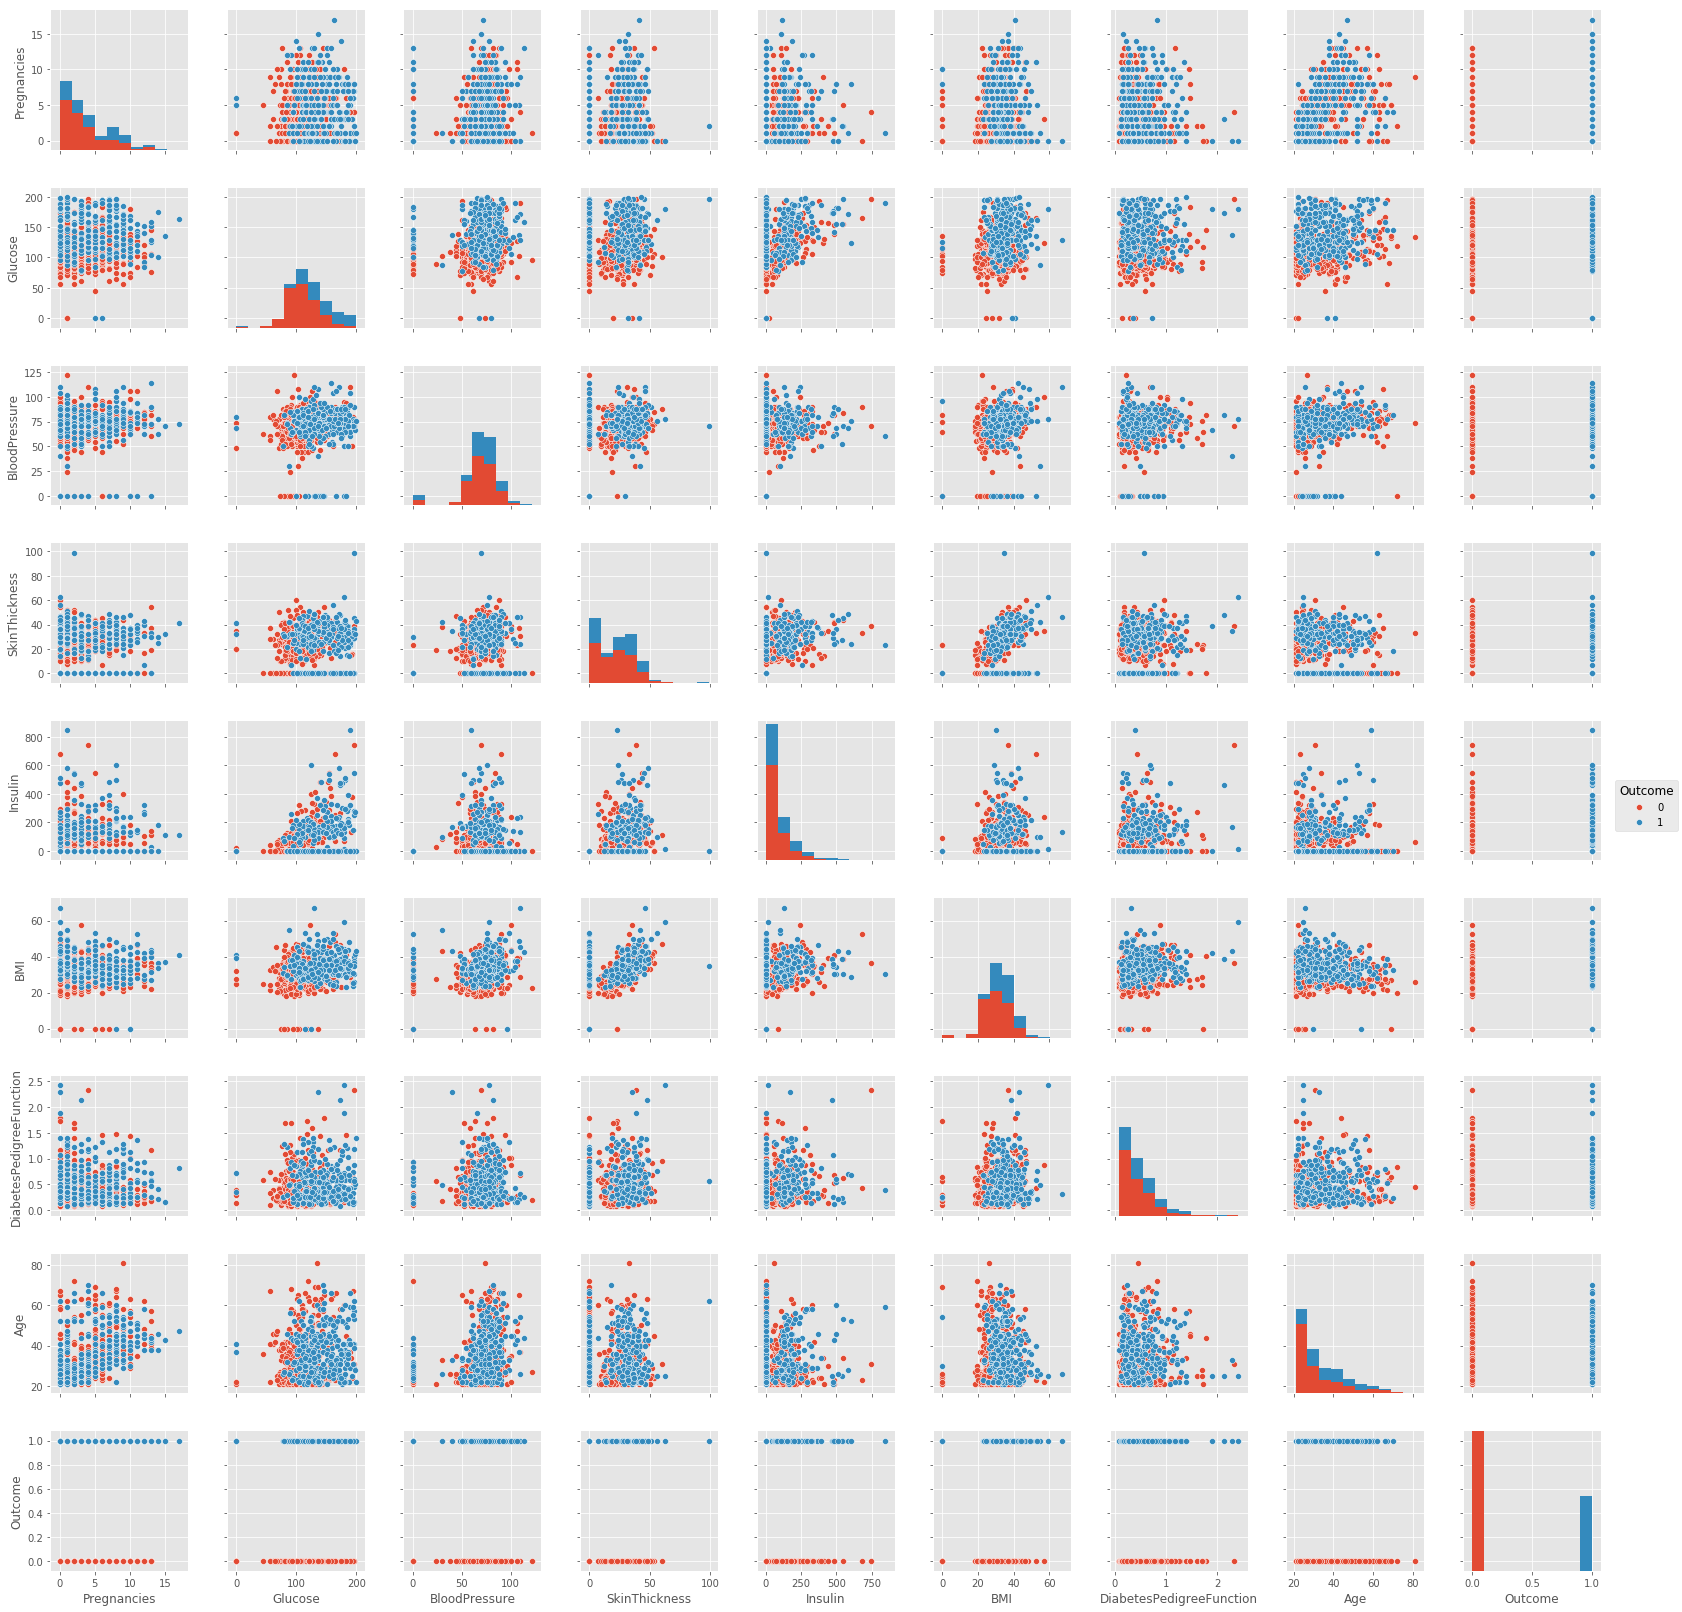

In [17]:
sns.pairplot(df, hue = "Outcome")

(array([1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 9 Text xticklabel objects>)

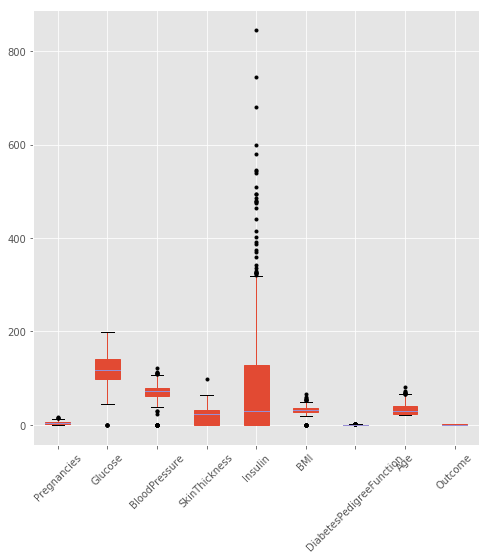

In [23]:
df.boxplot(patch_artist=True, figsize=(8,8), sym=".k")
plt.xticks(rotation=45)

In [32]:
from sklearn.cross_validation import train_test_split

In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, 
                                                   stratify=Y)

In [40]:
Y.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [38]:
Y_train.value_counts()

0    299
1    161
Name: Outcome, dtype: int64

In [39]:
Y_test.value_counts()

0    201
1    107
Name: Outcome, dtype: int64

In [47]:
from sklearn.neighbors import KNeighborsClassifier

In [42]:
neighbors = np.arange(1, 9)

In [43]:
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

In [48]:
for i,k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    train_accuracy[i] = knn.score(X_train, Y_train)
    test_accuracy[i] = knn.score(X_test, Y_test)

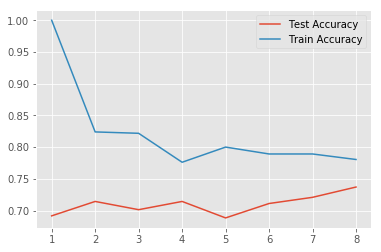

In [51]:
plt.plot(neighbors, test_accuracy, label = "Test Accuracy")
plt.plot(neighbors, train_accuracy, label = "Train Accuracy")
plt.legend()

In [52]:
from sklearn.metrics import confusion_matrix

In [54]:
y_pred = knn.predict(X_test)

In [55]:
confusion_matrix(Y_test, y_pred)

array([[174,  27],
       [ 54,  53]], dtype=int64)

In [57]:
pd.crosstab(Y_test, y_pred, rownames=["Actual"], colnames=["Predicted"], 
           margins=True)

Predicted,0,1,All
Actual,,,
0,174,27,201
1,54,53,107
All,228,80,308


In [58]:
from sklearn.metrics import classification_report

In [60]:
print(classification_report(Y_test, y_pred))

             precision    recall  f1-score   support

          0       0.76      0.87      0.81       201
          1       0.66      0.50      0.57       107

avg / total       0.73      0.74      0.73       308



In [67]:
y_pred_prob = knn.predict_proba(X_test)[:,1]

In [69]:
from sklearn.metrics import roc_curve

In [70]:
fpr, tpr, threshold = roc_curve(Y_test, y_pred_prob)

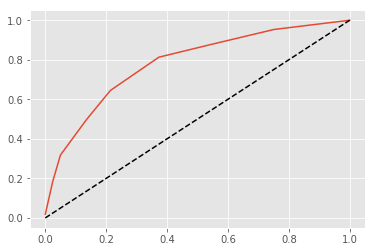

In [72]:
plt.plot(fpr, tpr, label ='KNN')
plt.plot([0, 1], [0, 1], "k--")

In [73]:
from sklearn.model_selection import GridSearchCV

In [74]:
param_grid = {"n_neighbors": np.arange(1, 50)}

In [75]:
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid, cv=5)
knn_cv.fit(X_train, Y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [76]:
knn_cv.best_score_

0.741304347826087

In [77]:
knn_cv.best_params_

{'n_neighbors': 20}